<span style="font-size:1.6em;color:darkblue">**Churn Prediction Case Study**</span>

<span style="font-size:1em;color:darkblue">**Code Owner: Mehmet Alper ŞAHİN**</span>

<span style="font-size:1em;color:darkblue">**Last Update: 2024.11.25**</span>

<span style="font-size:1.2em;color:darkblue">**Scenario**</span>

<span style="font-size:1em;color:black">**You are tasked with reducing customer churn for XYZ Telecom.The business team has provided you with customer data, including demographics, account details, and usage patterns.**</span>

<span style="font-size:1em;color:black">**Your goal is to predict which customers are at risk of leaving and provide actionable insights to retain them.**</span>

<span style="font-size:1.2em;color:darkblue">**Libraries**</span>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.utils import shuffle

# Synthetic Data Generation
from sklearn.utils import resample # imbalance---> balance data

from imblearn.over_sampling import SMOTE # imbalance---> balance data

# ML Models
from sklearn.preprocessing import StandardScaler # Normalization data

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression  # Logistic Regression Algorithm

from sklearn.naive_bayes import BernoulliNB # Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB # Naive Bayes Algorithm

from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbor Algorithm

from sklearn.svm import SVC # Support Vector Machine Algorithm

from sklearn.ensemble import RandomForestClassifier # Random Forest Algorithm

from sklearn.ensemble import AdaBoostClassifier# Adaboost Algorithm

from catboost import CatBoostClassifier # Catboost Algorithm

from xgboost import XGBClassifier #XGBoost Algorithm


## Model Metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import recall_score

from sklearn.metrics import precision_score

from sklearn.metrics import f1_score


from warnings import filterwarnings
filterwarnings('ignore')

<span style="font-size:1.2em;color:darkblue">**Data Analysis**</span>

In [2]:
raw_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
raw_data.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
raw_data.info()
# There is no missing value in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Customer ID must be the unique value. 
# If there is a more than one record regards to customer ID, this record could be eliminated from the main data

raw_data.groupby(by = 'customerID').count().max()

gender              1
SeniorCitizen       1
Partner             1
Dependents          1
tenure              1
PhoneService        1
MultipleLines       1
InternetService     1
OnlineSecurity      1
OnlineBackup        1
DeviceProtection    1
TechSupport         1
StreamingTV         1
StreamingMovies     1
Contract            1
PaperlessBilling    1
PaymentMethod       1
MonthlyCharges      1
TotalCharges        1
Churn               1
dtype: int64

In [6]:
'''
TotalCharges must be float, but in the raw data it was stored as an object.

When I tried to run:

   raw_data['TotalCharges'] = raw_data['TotalCharges'].astype('float64')

It raises to ValueError: could not convert string to float: ''
''' 

print(f"Total Charges is empty for { len(raw_data[raw_data['TotalCharges'] == ' ']) } records.")

raw_data_filt = raw_data[raw_data['TotalCharges'] != ' ']

raw_data_filt['TotalCharges'] = raw_data_filt.TotalCharges.astype('float64')

Total Charges is empty for 11 records.


In [7]:
raw_data_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [8]:
def show_count_graph(df, column_name):
    '''
    Analyze the distribution of categorical values
    '''

    sub_df = df.groupby(by = column_name).count()

    plt.bar(sub_df.index, 
            sub_df['customerID'],
            align='center',
            color = 'black')
    
    plt.title(f'Distribution of {column_name}')
    plt.show()

In [9]:
# Check the categorical colum names
raw_data_filt.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

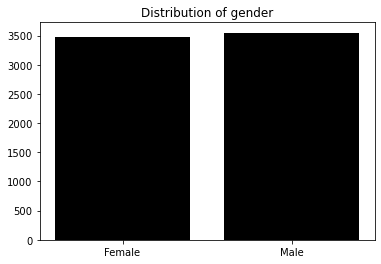

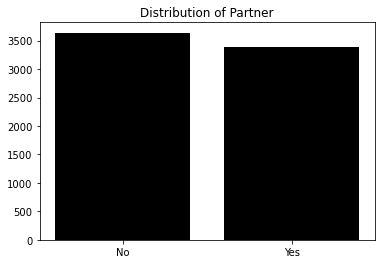

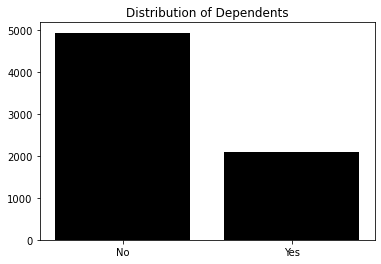

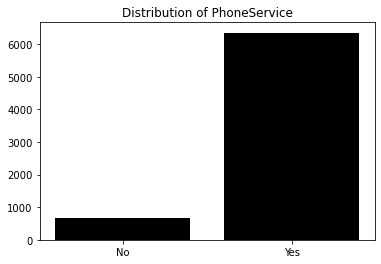

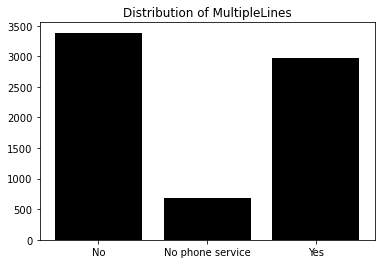

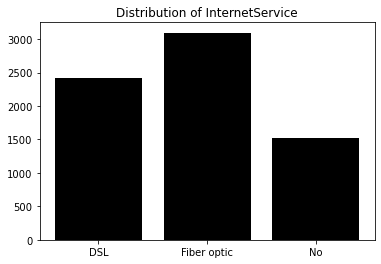

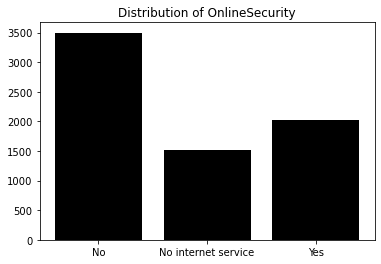

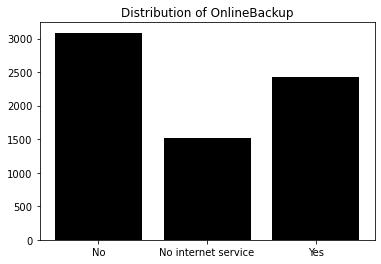

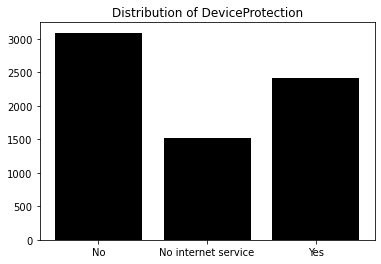

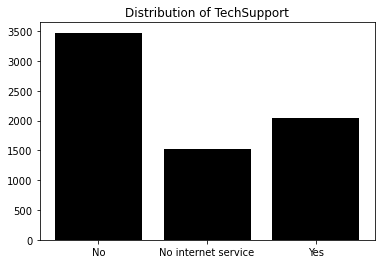

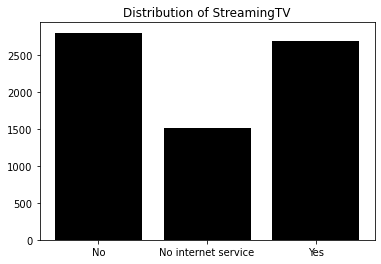

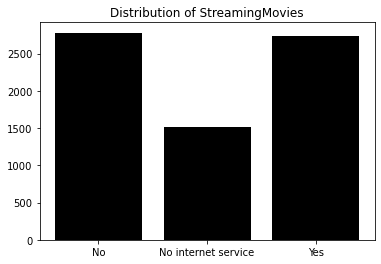

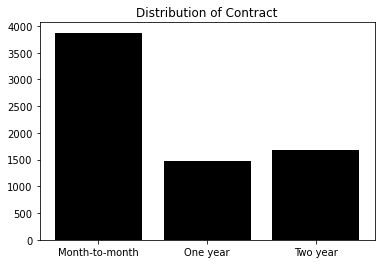

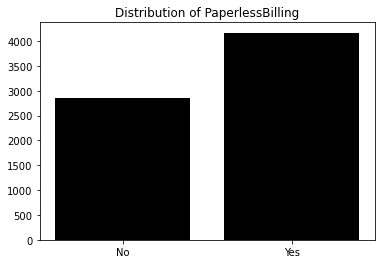

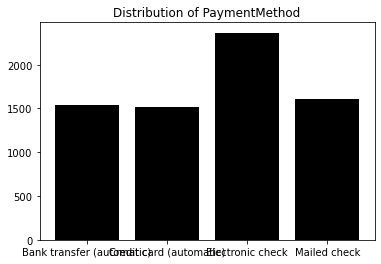

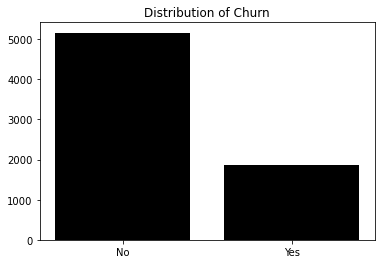

In [10]:
categorical_variables = ['gender', 'Partner', 
                         'Dependents', 'PhoneService',
                         'MultipleLines', 'InternetService', 
                         'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies',
                         'Contract', 'PaperlessBilling', 
                         'PaymentMethod', 'Churn']

for col in categorical_variables:
    show_count_graph(raw_data_filt, col)

In [11]:
raw_data_filt.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
print(f"Churn rate: {round(len(raw_data_filt[raw_data_filt.Churn == 'Yes']) / len(raw_data_filt)*100,2)} %")

# Toplam veri içerisindeki yaklaşık 26.5%'lik bir kesimm churn olmuştur. 
# Geliştirilecek modeller için etiketin imbalance olması göz önünde bulundurulmalıdır.

Churn rate: 26.58 %


In [13]:
def show_churn_graph(df, column_name):
    '''
    Analyze the distribution of categorical values
    '''
    sns.histplot(x = df[column_name],
                hue = df['Churn'],
                multiple="stack"
            )
    
    plt.title(f'Distribution of {column_name}')
    plt.show()

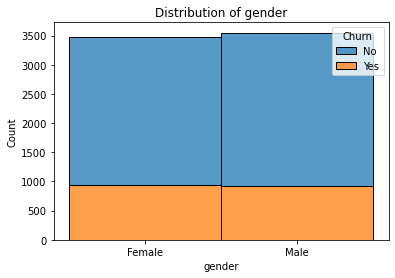

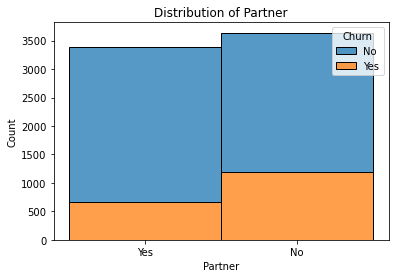

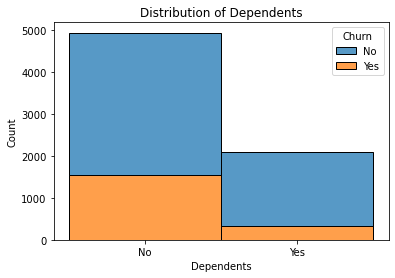

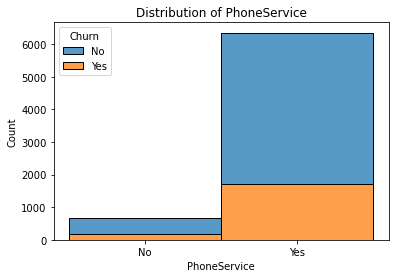

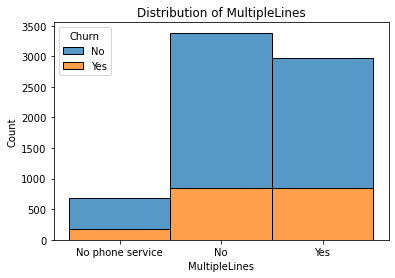

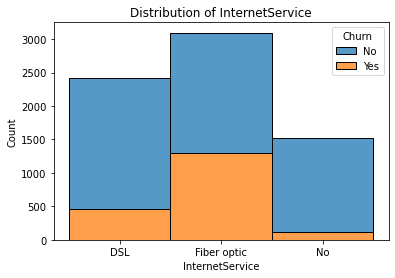

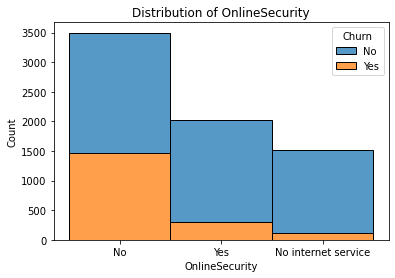

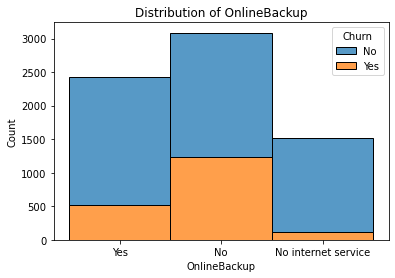

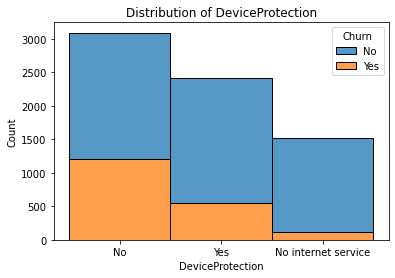

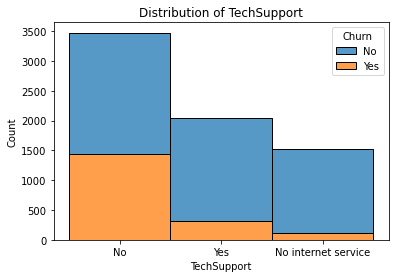

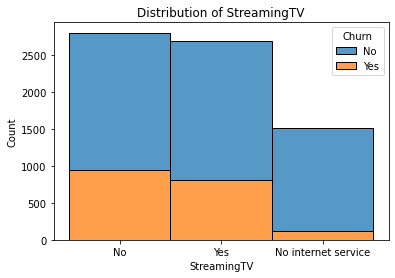

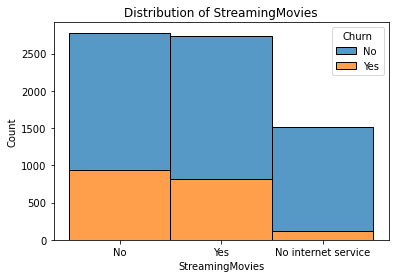

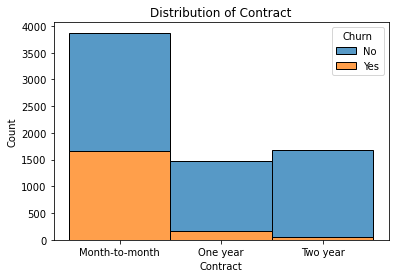

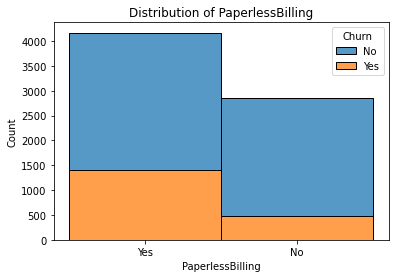

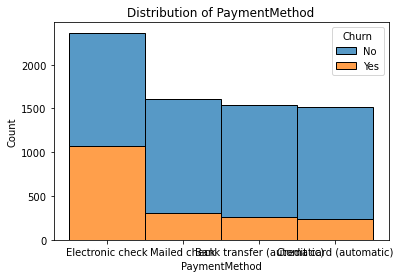

In [14]:
categorical_variables = ['gender', 'Partner', 
                         'Dependents', 'PhoneService',
                         'MultipleLines', 'InternetService', 
                         'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies',
                         'Contract', 'PaperlessBilling', 
                         'PaymentMethod']

for col in categorical_variables:
    show_churn_graph(raw_data_filt, col)

In [ ]:
# There is a general churn among those using fiber optic cables, and this aspect should be improved.
# There is also a high churn rate among individuals who do not make payments automatically

In [15]:
raw_data_filt.describe().T

count         mean          std    min       25%       50%  \
SeniorCitizen   7032.0     0.162400     0.368844   0.00    0.0000     0.000   
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
SeniorCitizen      0.0000     1.00  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

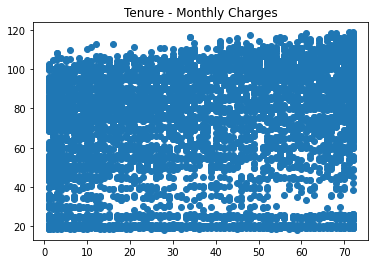

In [16]:
plt.scatter(raw_data_filt.tenure, 
            raw_data_filt.MonthlyCharges)

plt.title(f'Tenure - Monthly Charges')

plt.show()

# There is no relation between Tenure & Monthly Charges

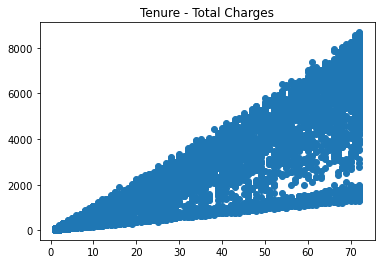

In [17]:
plt.scatter(raw_data_filt.tenure, 
            raw_data_filt.TotalCharges)

plt.title(f'Tenure - Total Charges')

plt.show()

# There is positive correlation between Tenure & Total Charges

In [18]:
# The churn rate can be analyzed based on the contract type.
raw_data_filt.groupby(by = ['Contract', 'Churn']).count()['customerID']

# Generally, individuals with month-to-month contracts have a much higher churn rate compared to the overall population.
# A model developed for customers on monthly contracts could provide
# a more effective result in retaining customers with the company.

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1306
                Yes       166
Two year        No       1637
                Yes        48
Name: customerID, dtype: int64

<AxesSubplot:>

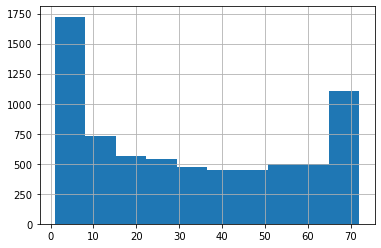

In [19]:
# Distribution of Tenure
raw_data_filt.tenure.hist()

# Considering the services provided by the telecom company, 
# those who have been using it for 50 years or more were likely only using the telephone service.

In [20]:
raw_data_filt.groupby(by = ['Contract', 'Churn']).describe()['tenure']

# People who have been using this telecom line for a long time are likely to exhibit long-term contract renewal behavior.
# For the sample, leaving the telecom company is more prominent for those with 21 years or less of tenure.

count       mean        std   min    25%   50%   75%  \
Contract       Churn                                                          
Month-to-month No     2220.0  21.033333  18.398051   1.0   5.00  16.0  33.0   
               Yes    1655.0  14.016918  15.828615   1.0   2.00   7.0  21.0   
One year       No     1306.0  41.705972  19.066431   1.0  26.00  43.0  58.0   
               Yes     166.0  44.963855  18.367261   2.0  33.00  48.0  59.0   
Two year       No     1637.0  56.948687  17.875481   1.0  48.00  64.0  71.0   
               Yes      48.0  61.270833  11.004331  25.0  55.75  65.5  70.0   

                       max  
Contract       Churn        
Month-to-month No     72.0  
               Yes    71.0  
One year       No     72.0  
               Yes    72.0  
Two year       No     72.0  
               Yes    72.0

In [21]:
risky_group = raw_data_filt[raw_data_filt.tenure <= 21]
risky_group.groupby(by = ['Contract', 'Churn']).describe()['tenure']

# It is clearly observed that customers with a few years of tenure (up to 8 years) prefer to have monthly contracts.

count       mean       std  min   25%   50%   75%   max
Contract       Churn                                                          
Month-to-month No     1318.0   8.147951  6.192076  1.0  2.00   7.0  13.0  21.0
               Yes    1244.0   6.137460  5.721302  1.0  1.00   4.0  10.0  21.0
One year       No      228.0  12.500000  5.444554  1.0  9.00  13.0  17.0  21.0
               Yes      24.0  12.666667  5.858228  2.0  8.75  12.0  18.0  21.0
Two year       No      116.0  12.206897  5.257735  1.0  8.00  12.5  16.0  21.0

In [22]:
fig = px.scatter_3d(raw_data_filt, 
                    x = 'Contract', 
                    y = 'MonthlyCharges', 
                    z = 'tenure',
                    color = 'Churn')
fig.show()

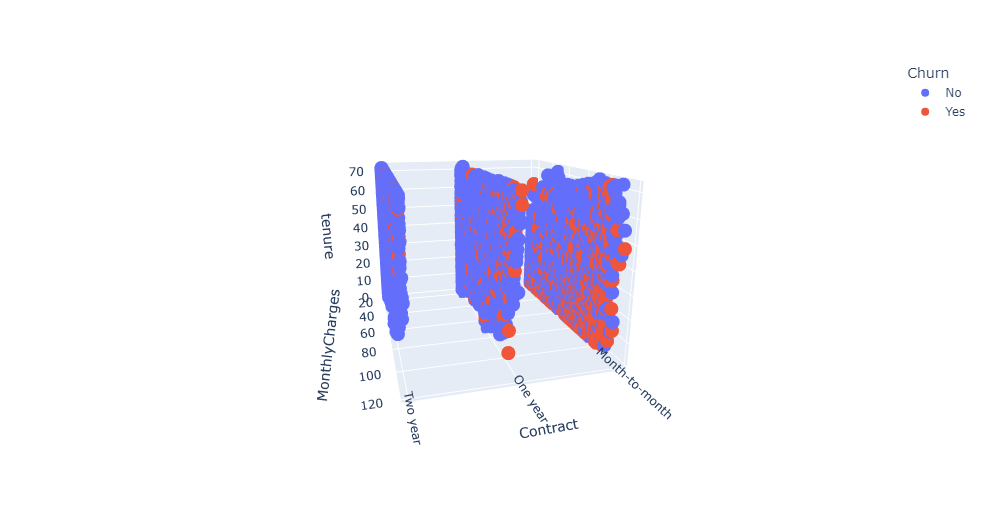

In [24]:
raw_data_filt.groupby(by = 'Contract')['TotalCharges'].describe()

count         mean          std    min      25%      50%  \
Contract                                                                    
Month-to-month  3875.0  1369.254581  1613.879008  18.85   160.10   679.55   
One year        1472.0  3034.683084  2229.730075  18.80   989.35  2657.55   
Two year        1685.0  3728.933947  2571.252806  20.35  1278.80  3623.95   

                     75%      max  
Contract                           
Month-to-month  2066.500  8061.50  
One year        4859.525  8684.80  
Two year        5999.850  8672.45

<span style="font-size:1.1em;color:darkblue">**Handle Categorical Varables:**</span>

In [25]:
main_data = pd.get_dummies(raw_data_filt, 
                           columns = raw_data_filt.select_dtypes(include='object').columns[1:], 
                           drop_first=True)

<span style="font-size:1.1em;color:darkblue">**Linear Correlation of Independent Variables:**</span>

Text(0.5, 1.0, 'Correlation Matrix')

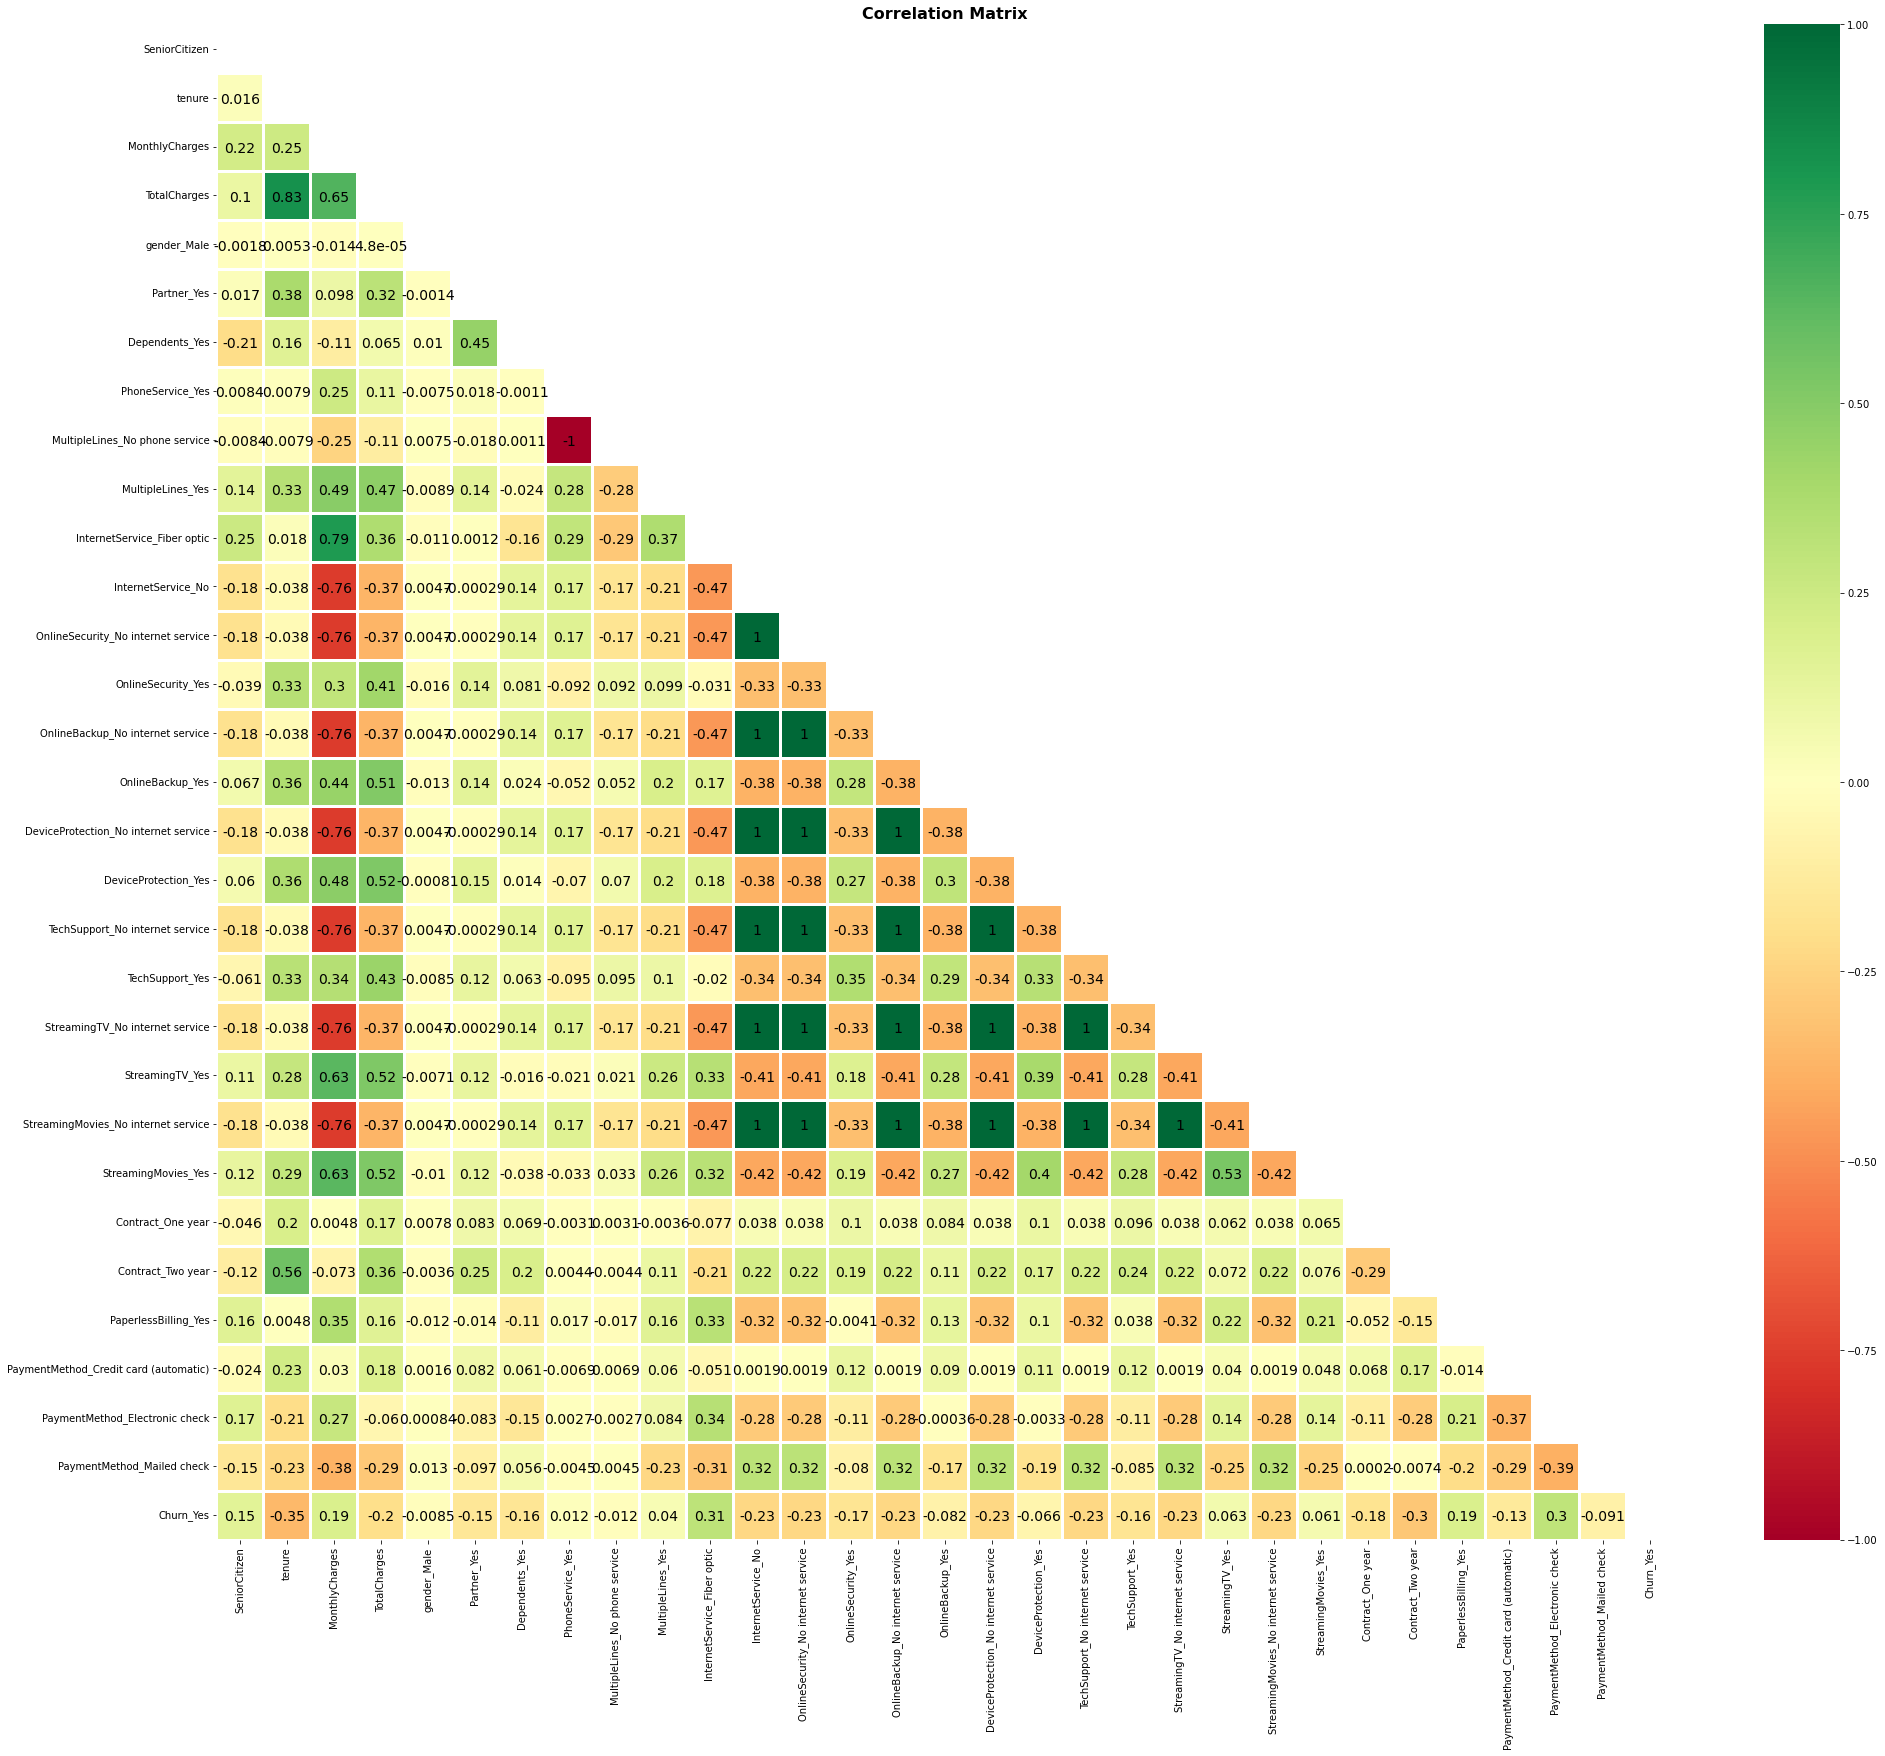

In [26]:
'''
With values close to -1, there is a strong inverse ratio between the two variables.
With values close to 1,  there is a strong direct ratio between the two variables.
With values close to 0,  there is no correlation.
'''

plt.rcParams["figure.figsize"] = [28.50, 24.50]
plt.rcParams["figure.autolayout"] = True

corr= main_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,cmap="RdYlGn", annot = True, 
            annot_kws={"size": 14, "va": "center_baseline", 
                       "color": "black"},mask = mask,
            linewidth=3, vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontweight = 'bold', fontsize = 16)

In [ ]:
# TotalCharges & Tenure has a high positive linear correlation.
# If the model includes both of them, it can occur a multicollinearity. 
# In that reason, TotalCharges is removed from the dataset. 

<span style="font-size:1.1em;color:darkblue">**Build a Model:**</span>

In [28]:
main_data = main_data.drop(['customerID', 'TotalCharges'], 
                           axis = 1)

In [29]:
df_train, df_test = train_test_split(main_data, 
                            test_size = 0.30,
                            random_state = 8)

In [30]:
# Make sure the possible churn data points in the both train & test set. 
df_train.groupby(by = 'Churn_Yes').count()

SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
Churn_Yes                                                                    
0                   3605    3605            3605         3605         3605   
1                   1317    1317            1317         1317         1317   

           Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
Churn_Yes                                                                     
0                    3605              3605                            3605   
1                    1317              1317                            1317   

           MultipleLines_Yes  InternetService_Fiber optic  ...  \
Churn_Yes                                                  ...   
0                       3605                         3605  ...   
1                       1317                         1317  ...   

           StreamingTV_No internet service  StreamingTV_Yes  \
Churn_Yes                                                     
0                                     3605             3605   
1                                     1317             1317   

           StreamingMovies_No internet service  StreamingMovies_Yes  \
Churn_Yes                                                             
0                                         3605                 3605   
1                                         1317                 1317   

           Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
Churn_Yes                                                               
0                       3605               3605                  3605   
1                       1317               1317                  1317   

           PaymentMethod_Credit card (automatic)  \
Churn_Yes                                          
0                                           3605   
1                                           1317   

           PaymentMethod_Electronic check  PaymentMethod_Mailed check  
Churn_Yes                                                              
0                                    3605                        3605  
1                                    1317                        1317  

[2 rows x 29 columns]

In [31]:
df_test.groupby(by = 'Churn_Yes').count()

SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
Churn_Yes                                                                    
0                   1558    1558            1558         1558         1558   
1                    552     552             552          552          552   

           Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
Churn_Yes                                                                     
0                    1558              1558                            1558   
1                     552               552                             552   

           MultipleLines_Yes  InternetService_Fiber optic  ...  \
Churn_Yes                                                  ...   
0                       1558                         1558  ...   
1                        552                          552  ...   

           StreamingTV_No internet service  StreamingTV_Yes  \
Churn_Yes                                                     
0                                     1558             1558   
1                                      552              552   

           StreamingMovies_No internet service  StreamingMovies_Yes  \
Churn_Yes                                                             
0                                         1558                 1558   
1                                          552                  552   

           Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
Churn_Yes                                                               
0                       1558               1558                  1558   
1                        552                552                   552   

           PaymentMethod_Credit card (automatic)  \
Churn_Yes                                          
0                                           1558   
1                                            552   

           PaymentMethod_Electronic check  PaymentMethod_Mailed check  
Churn_Yes                                                              
0                                    1558                        1558  
1                                     552                         552  

[2 rows x 29 columns]

<span style="font-size:1.1em;color:darkblue">**Base Model:**</span>

<span style="font-size:0.9em;color:darkblue">**Model Metrics:Accuracy & F1_Score**</span>

In [32]:
# Check the data is balance or imbalance.
# If the class ratio is between lower and upper threshold, the is balanced. Otherwise the data is imbalance
balance_upper_thres = 0.65
balance_lower_thres = 0.35

# ratio of the oversampling in the training set.
minority_majority_ratio = 1

# Performance metrics weights
weight_acc = 0.5
weight_f1 = 0.5

#Specific path to save the model.
model_path = None


print('ML Model process is starting')
print('Train & Test Split')

train_log_follow = []

model_saving_time = str(datetime.now())[:19].replace(':' , '_')
model_saving_time = model_saving_time.replace('-' , '_')
model_saving_time = model_saving_time.replace(' ' , '_')

start = datetime.now()

random_state_parameter = [0,8,32,46,67] # Cross Validation 5

accuracy_log, f1_log, accuracy_nb, f1_nb, accuracy_knn, f1_knn, accuracy_svm, f1_svm, accuracy_rf, f1_rf, accuracy_xgb, f1_xgb, accuracy_catb, f1_catb, accuracy_adab, f1_adab   = ([] for i in range(16))                

synthetic_data = False # As a default, my assumption is: Data is balanced.

for i in range(len(random_state_parameter)): # Train models and monitor the model results for five different
                                             # train&validation data

    possible_churn = len( df_train[df_train['Churn_Yes'] == 1] )  # 1: refer churn possible
    no_churn= len(df_train) - possible_churn # Total_record - possible_churn is given no_churn
    
    # Make sure that minority class is divided almost equally between train and validation set. 
    df_train_churn, df_valid_churn  = train_test_split(df_train[df_train['Churn_Yes'] == 1], 
                                                   test_size = 0.50,
                                                   random_state = random_state_parameter[i])
    
    # Majority class can be splitted 80%-20%
    df_train_nchurn, df_valid_nchurn= train_test_split(df_train[df_train['Churn_Yes'] == 0],
                                                   test_size = 0.20,
                                                   random_state = random_state_parameter[i])

    df_train_new = shuffle(pd.concat([df_train_churn, df_train_nchurn]))
    df_valid = shuffle(pd.concat([df_valid_churn, df_valid_nchurn]))

    # Check the imbalance|balance condition.
    if (len(df_train_churn)/len(df_train_new) <= balance_upper_thres) & (len(df_train_churn)/len(df_train_new) >= balance_lower_thres) :
        # Balanced data.
        x_train = df_train_new.drop('Churn_Yes', axis=1).values # Inputs (Except churn)
        y_train = df_train_new['Churn_Yes'].values # Outputs: Churn
        x_valid = df_valid.drop('Churn_Yes', axis=1).values 
        y_valid = df_valid['Churn_Yes'].values

#--------------------------------------------------------------------------------------------------------------------------                

    else :
        # Imbalanced data.
        synthetic_data = True
        print('Cross Validation Step: ', i+1, ' Synthetic data generation...')

        if possible_churn > no_churn :  
            #create two different dataframe of majority and minority class 
            df_majority = df_train_new[(df_train_new['Churn_Yes']==1)] 
            df_minority = df_train_new[(df_train_new['Churn_Yes']==0)] 
       
        else:  
            #create two different dataframe of majority and minority class 
            df_majority = df_train_new[(df_train_new['Churn_Yes']==0)] 
            df_minority = df_train_new[(df_train_new['Churn_Yes']==1)]
        
        sample = int(len(df_majority)* minority_majority_ratio ) # type of variable (sample) have to be integer    
        # upsample minority class
        df_minority_upsampled = resample(df_minority, 
                                         replace=True,    # sample with replacement
                                         n_samples= sample, # to match majority class
                                         random_state=42)  # reproducible results

        # Combine majority class with upsampled minority class
        df_upsampled = shuffle(pd.concat([df_minority_upsampled, df_majority]))


        x_train = df_upsampled.drop('Churn_Yes', axis=1).values
        y_train = df_upsampled['Churn_Yes'].values
        x_valid = df_valid.drop('Churn_Yes', axis=1).values
        y_valid = df_valid['Churn_Yes'].values

#--------------------------------------------------------------------------------------------------------------------------                   
    # Using Standard Scaler for normalization data
    sc = StandardScaler()
    x_train_sc = sc.fit_transform(x_train)
    x_valid_sc = sc.transform(x_valid)
    
    #Logistic Regression
    logistic_reg_classifier = LogisticRegression()
    logistic_reg_classifier.fit(x_train_sc, y_train)
    y_pred_logistic = logistic_reg_classifier.predict(x_valid_sc)                  

    accuracy_log.append( accuracy_score(y_valid, y_pred_logistic) )
    f1_log.append(f1_score(y_valid, y_pred_logistic))

    # Naive Bayes

    nb_classifier= BernoulliNB()
    nb_classifier.fit(x_train_sc,y_train)
    y_pred_nb = nb_classifier.predict(x_valid_sc)

    accuracy_nb.append(accuracy_score(y_valid, y_pred_nb ))
    f1_nb.append( f1_score(y_valid, y_pred_nb ) )     


    # K Nearest Neighbor

    knn_classifier= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn_classifier.fit(x_train_sc,y_train)
    y_pred_knn = knn_classifier.predict(x_valid_sc)

    accuracy_knn.append( accuracy_score(y_valid, y_pred_knn) )
    f1_knn.append(f1_score(y_valid, y_pred_knn))

    # Support Vector Machine

    svc_classifier = SVC(kernel = 'rbf')
    svc_classifier.fit(x_train_sc, y_train)
    y_pred_svc = svc_classifier.predict(x_valid_sc)

    accuracy_svm.append( accuracy_score(y_valid, y_pred_svc) )
    f1_svm.append(f1_score(y_valid, y_pred_svc)) 

    # Random Forest Algorithm

    rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state=0)
    rf_classifier.fit(x_train_sc, y_train)
    y_pred_rf = rf_classifier.predict(x_valid_sc)

    accuracy_rf.append( accuracy_score(y_valid, y_pred_rf) )
    f1_rf.append(f1_score(y_valid, y_pred_rf) )                

    # XGBoost Algorithm

    xgb_classifier = XGBClassifier()
    xgb_classifier.fit(x_train_sc, y_train)
    y_pred_xgb = xgb_classifier.predict(x_valid_sc)

    accuracy_xgb.append( accuracy_score(y_valid, y_pred_xgb) )
    f1_xgb.append(f1_score(y_valid, y_pred_xgb) )                  

    # CatBoost Algorithm

    catb_classifier = CatBoostClassifier(verbose=False)
    catb_classifier.fit(x_train_sc, y_train)
    y_pred_catb = catb_classifier.predict(x_valid_sc)

    accuracy_catb.append( accuracy_score(y_valid, y_pred_catb) )
    f1_catb.append(f1_score(y_valid, y_pred_catb) )

    # AdaBoost Algorithm

    adab_classifier = AdaBoostClassifier(n_estimators= 100)
    adab_classifier.fit(x_train_sc, y_train)
    y_pred_adab = adab_classifier.predict(x_valid_sc)

    accuracy_adab.append( accuracy_score(y_valid, y_pred_adab))
    f1_adab.append(f1_score(y_valid, y_pred_adab) ) 

log_mean = (weight_acc)*np.mean( accuracy_log ) + (weight_f1)*np.mean(f1_log) 
nb_mean = (weight_acc)*np.mean( accuracy_nb ) + (weight_f1)*np.mean(f1_nb) 
knn_mean = (weight_acc)*np.mean( accuracy_knn ) + (weight_f1)*np.mean(f1_knn)
svm_mean = (weight_acc)*np.mean( accuracy_svm ) + (weight_f1)*np.mean(f1_svm) 
rf_mean = (weight_acc)*np.mean( accuracy_rf ) + (weight_f1)*np.mean(f1_rf) 
xgb_mean = (weight_acc)*np.mean( accuracy_xgb ) + (weight_f1)*np.mean(f1_xgb)
catb_mean = (weight_acc)*np.mean( accuracy_catb ) + (weight_f1)*np.mean(f1_catb)
adab_mean = (weight_acc)*np.mean( accuracy_adab ) + (weight_f1)*np.mean(f1_adab)

model_compare =[log_mean, nb_mean, knn_mean, svm_mean, rf_mean,xgb_mean, catb_mean, adab_mean]
model_list = ('Logistic Regression','Naive Bayes', 'KNN', 'SVM', 'RF', 'XGB', 'CATB', 'ADAB')

print('Models are trained.')

#--------------------------------------------------------------------------------------------------------------------------

# Fine tuning of best model
final_metrics = []

for j in range (len(model_compare)):

    if model_compare[j] == np.max(model_compare):

        running_algorithm = model_list[j]
#-------------------------------------------------------------------------------------------------------------------------- 

        if model_list[j] == 'Logistic Regression':
            #print('Logistic Regression algorithm is used')
            penalty = [('l1','saga'), ('l2','saga'), ('l2','newton-cg'),('l2','lbfgs'), ('l2','sag'), ('elasticnet','saga') ]

            for i in penalty:
                if i[0] == 'elasticnet':

                    penalty_ratio = [0.2,0.4,0.6,0.8]
                    for j in penalty_ratio:
                        final_logreg_model = LogisticRegression(penalty= i[0], solver = i[1], l1_ratio = j)
                        final_logreg_model.fit(x_train_sc, y_train)
                        final_y_pred_logistic = final_logreg_model.predict(x_valid_sc)

                        # Calculate weighted metric ( Combine accuracy & f1 score)                                       
                        final_metrics.append((weight_acc) * accuracy_score(y_valid, final_y_pred_logistic) + \
                                             (weight_f1) * f1_score(y_valid, final_y_pred_logistic))

                else:

                    final_logreg_model = LogisticRegression(penalty= i[0], solver = i[1])
                    final_logreg_model.fit(x_train_sc, y_train)
                    final_y_pred_logistic = final_logreg_model.predict(x_valid_sc)

                    # Calculate weighted metric ( Combine accuracy & f1 score)
                    final_metrics.append((weight_acc) * accuracy_score(y_valid, final_y_pred_logistic) +\
                                         (weight_f1) * f1_score(y_valid, final_y_pred_logistic))

            for fine_tune in range (len(final_metrics)):
                if final_metrics[fine_tune] == np.max(final_metrics):
                    if fine_tune >= 5 :
                        base_model = LogisticRegression(penalty= penalty[5][0], 
                                                              solver = penalty[5][1],
                                                              l1_ratio = penalty_ratio[fine_tune - 5 ])
                        base_model.fit(x_train_sc, y_train)
                        base_model_y_pred = base_model.predict(x_valid_sc)

                    else:
                        base_model = LogisticRegression(penalty= penalty[fine_tune][0], 
                                                              solver = penalty[fine_tune][1])
                        base_model.fit(x_train_sc, y_train)
                        base_model_y_pred = base_model.predict(x_valid_sc)

            # Save the model as a pickle in a file

            #joblib.dump(base_model, model_path + 'model.pkl')
            print(' Model is succesfully saved')

#--------------------------------------------------------------------------------------------------------------------------

        elif model_list[j] == 'Naive Bayes':
            #print('Naive Bayes algorithm is used')
            methods = ['GaussianNB','BernoulliNB']

            for i in methods:
                if i == 'GaussianNB':

                    final_nb_model = GaussianNB()
                    final_nb_model.fit(x_train_sc, y_train)
                    final_nb_y_pred = final_nb_model.predict(x_valid_sc)

                    # Calculate weighted metric ( Combine accuracy & f1 score)                                       
                    final_metrics.append((weight_acc) * accuracy_score(y_valid, final_nb_y_pred)\
                                         + (weight_f1) * f1_score(y_valid, final_nb_y_pred))

                else:

                    final_nb_model = BernoulliNB()
                    final_nb_model.fit(x_train_sc, y_train)
                    final_nb_y_pred = final_nb_model.predict(x_valid_sc)

                    # Calculate weighted metric ( Combine accuracy & f1 score)                                       
                    final_metrics.append((weight_acc) * accuracy_score(y_valid, final_nb_y_pred) + \
                                         (weight_f1) * f1_score(y_valid, final_nb_y_pred))

            for fine_tune in range (len(final_metrics)):
                if final_metrics[fine_tune] == np.max(final_metrics):
                    if methods[fine_tune] == 'GaussianNB':
                        base_model = GaussianNB()
                        base_model.fit(x_train_sc, y_train)
                        base_model_y_pred = base_model.predict(x_valid_sc)

                    else:
                        base_model = BernoulliNB()
                        base_model.fit(x_train_sc, y_train)
                        base_model_y_pred = base_model.predict(x_valid_sc)

            # Save the model as a pickle in a file

            #joblib.dump(base_model, model_path + 'model.pkl')
            print('Model is succesfully saved')

#--------------------------------------------------------------------------------------------------------------------------

        elif model_list[j] == 'KNN':
            #print('K-Nearest Neighbor algorithm is used')
            parameters = [(5,'uniform', 1) , (5,'uniform', 2),(7,'uniform', 1) , (7,'uniform', 2)]
            for i in parameters:
                final_knn_model = KNeighborsClassifier(n_neighbors = i[0], 
                                                       weights= i[1] ,
                                                       metric = 'minkowski',
                                                       p = i[2])
                final_knn_model.fit(x_train_sc, y_train)
                final_knn_y_pred = final_knn_model.predict(x_valid_sc) 

                # Calculate weighted metric ( Combine accuracy & f1 score)                                       
                final_metrics.append((weight_acc) * accuracy_score(y_valid, final_knn_y_pred) +\
                                     (weight_f1) * f1_score(y_valid, final_knn_y_pred))

            for fine_tune in range (len(final_metrics)):
                if final_metrics[fine_tune] == np.max(final_metrics): 
                    base_model = KNeighborsClassifier(n_neighbors = parameters[fine_tune][0] ,
                                                            weights= parameters[fine_tune][1] ,
                                                            metric = 'minkowski', 
                                                            p = parameters[fine_tune][2])
                    base_model.fit(x_train_sc, y_train)
                    base_model_y_pred = base_model.predict(x_valid_sc)

            # Save the model as a pickle in a file
            
            #joblib.dump(base_model, model_path + 'model.pkl')

            print('Model is succesfully saved')

#--------------------------------------------------------------------------------------------------------------------------

        elif model_list[j] == 'SVM':
            #print('Support Vector Machine algorithm is used')
            parameters = [('linear', 'scale'), ('rbf','scale'), 
                          ('sigmoid','scale'), 
                          ('linear', 'auto'), 
                          ('rbf','auto'), 
                          ('sigmoid','auto'), 
                          ('poly','scale'), 
                          ('poly', 'auto')]
            
            for i in parameters:
                if i[0] == 'poly':
                    degree = [3,4]
                    for j in degree:
                        final_svm_model = SVC( kernel= i[0], gamma= i[1],  degree= j, probability=True)
                        final_svm_model.fit(x_train_sc, y_train)
                        final_svm_y_pred = final_svm_model.predict(x_valid_sc) 
                        # Calculate weighted metric ( Combine accuracy & f1 score)                                       
                        final_metrics.append((weight_acc) * accuracy_score(y_valid, final_svm_y_pred) + \
                                             (weight_f1) * f1_score(y_valid, final_svm_y_pred))

                else:
                    final_svm_model = SVC( kernel= i[0], gamma= i[1])
                    final_svm_model.fit(x_train_sc, y_train)
                    final_svm_y_pred = final_svm_model.predict(x_valid_sc) 

                    # Calculate weighted metric ( Combine accuracy & f1 score)                                       
                    final_metrics.append((weight_acc) * accuracy_score(y_valid, final_svm_y_pred) + \
                                         (weight_f1) * f1_score(y_valid, final_svm_y_pred))

            for fine_tune in range (len(final_metrics)):
                if final_metrics[fine_tune] == np.max(final_metrics):
                    try:
                        if (fine_tune == 6) | (fine_tune == 7) :                      
                            base_model = SVC( kernel= parameters[6][0], 
                                                   gamma= parameters[6][1], 
                                                   degree= degree[0], 
                                                   probability=True)
                            base_model.fit(x_train_sc, y_train)
                            base_model_y_pred = base_model.predict(x_valid_sc)

                        elif (fine_tune == 8) | (fine_tune == 9) :                      
                            base_model = SVC( kernel= parameters[7][0], 
                                                   gamma= parameters[7][1],  
                                                   degree= degree[1],
                                                   probability=True)
                            base_model.fit(x_train_sc, y_train)
                            base_model_y_pred = base_model.predict(x_valid_sc)

                        else:
                            base_model = SVC( kernel= parameters[fine_tune][0],
                                                   gamma= parameters[fine_tune][1], 
                                                   probability=True)
                            base_model.fit(x_train_sc, y_train)
                            base_model_y_pred = base_model.predict(x_valid_sc)


                    except ValueError:
                        pass
            # Save the model as a pickle in a file
                   
            #joblib.dump(base_model, model_path + 'model.pkl')

            print('Model issuccesfully saved')

#--------------------------------------------------------------------------------------------------------------------------

        elif model_list[j] == 'RF':
            #print('Random Forest algorithm is used')
            parameters = [(50,'gini','auto'), 
                          (50,'entropy','auto'), 
                          (100,'gini','auto'), 
                          (100,'entropy','auto'), 
                          (50,'gini','log2'), 
                          (50,'entropy','log2'), 
                          (100,'gini','log2'), 
                          (100,'entropy','log2') ]
            
            for i in parameters:                                                     
                final_rf_model = RandomForestClassifier(n_estimators = i[0], criterion=i[1], max_features=i[2])
                final_rf_model.fit(x_train_sc, y_train)
                final_rf_y_pred = final_rf_model.predict(x_valid_sc) 

                # Calculate weighted metric ( Combine accuracy & f1 score)                                       
                final_metrics.append((weight_acc) * accuracy_score(y_valid, final_rf_y_pred) + \
                                     (weight_f1) * f1_score(y_valid, final_rf_y_pred))

            for fine_tune in range (len(final_metrics)):
                if final_metrics[fine_tune] == np.max(final_metrics): 
                    try:
                        base_model = RandomForestClassifier(n_estimators = parameters[fine_tune][0],
                                                                  criterion=parameters[fine_tune][1], 
                                                                  max_features=parameters[fine_tune][2])
                        base_model.fit(x_train_sc, y_train)
                        base_model_y_pred = base_model.predict(x_valid_sc)

                    except ValueError:
                        pass
            # Save the model as a pickle in a file
            #joblib.dump(base_model, model_path + 'model.pkl')
            print('Model is succesfully saved')

#--------------------------------------------------------------------------------------------------------------------------

        elif model_list[j] == 'XGB':

            #print('XGB algorithm is used')
            parameters = [('gbtree','total_gain'), 
                          ('gblinear','weight'), 
                          ('dart','total_gain'), 
                          ('gbtree','weight'), 
                          ('dart','cover')]
            for i in parameters:
                final_xgb_model = XGBClassifier(booster = i[0], importance_type= i[1] )
                final_xgb_model.fit(x_train_sc, y_train)
                final_xgb_y_pred = final_xgb_model.predict(x_valid_sc) 

                # Calculate weighted metric ( Combine accuracy & f1 score)                                       
                final_metrics.append((weight_acc) * accuracy_score(y_valid, final_xgb_y_pred) + \
                                     (weight_f1) * f1_score(y_valid, final_xgb_y_pred))

            for fine_tune in range (len(final_metrics)):
                if final_metrics[fine_tune] == np.max(final_metrics): 
                    base_model = XGBClassifier(booster = parameters[fine_tune][0], 
                                                     importance_type= parameters[fine_tune][1])
                    base_model.fit(x_train_sc, y_train)
                    base_model_y_pred = base_model.predict(x_valid_sc)

            # Save the model as a pickle in a file                   
            #joblib.dump(base_model, model_path + 'model.pkl')

            print( 'Model is succesfully saved')

#--------------------------------------------------------------------------------------------------------------------------

        elif model_list[j] == 'CATB':
            #print('Catboost algorithm is used')
            base_model = CatBoostClassifier(verbose=False)
            base_model.fit(x_train_sc, y_train)
            base_model_y_pred = base_model.predict(x_valid_sc)

            # Save the model as a pickle in a file
            #joblib.dump(base_model, model_path + 'model.pkl')

            print( 'Model is succesfully saved')

#--------------------------------------------------------------------------------------------------------------------------

        elif model_list[j] == 'ADAB':
            try:
                #print('Adaboost algorithm is used')
                base_model = AdaBoostClassifier()
                base_model.fit(x_train_sc, y_train)
                base_model_y_pred = base_model.predict(x_valid_sc)
                # Save the model as a pickle in a file
                #joblib.dump(base_model, model_path +'model.pkl')
                print( 'Model is succesfully saved')
            except ValueError:
                pass

        model_running_time = (datetime.now() - start).seconds
        print('Process Time:', model_running_time, ' seconds')
        model_confusion_matrix = confusion_matrix(y_valid, base_model_y_pred)
        model_accuracy = np.round(accuracy_score(y_valid, base_model_y_pred),3)
        model_f1 = np.round(f1_score(y_valid, base_model_y_pred),3)
        row_column_ratio = np.round((x_train.shape[0]/ x_train.shape[1]),2)
        # Logging of the model metric for future releases.
        log_content = (str(datetime.now())[:19],
                       x_train.shape[0], 
                       x_train.shape[1], 
                       row_column_ratio , 
                       len(y_train[y_train == 0]),
                       len(y_train[y_train == 1]), 
                       synthetic_data, 
                       len(y_valid[y_valid == 0]),
                       len(y_valid[y_valid == 1]),
                       model_running_time, 
                       running_algorithm ,
                       5, 
                       model_accuracy, 
                       model_f1, 
                       model_confusion_matrix)
        train_log_follow.append(log_content) 
        break

    else:
        pass

ML Model process is starting
Train & Test Split
Cross Validation Step:  1  Synthetic data generation...
Cross Validation Step:  2  Synthetic data generation...
Cross Validation Step:  3  Synthetic data generation...
Cross Validation Step:  4  Synthetic data generation...
Cross Validation Step:  5  Synthetic data generation...
Models are trained.
Model is succesfully saved
Process Time: 33  seconds


In [33]:
train_log_follow_df = pd.DataFrame(train_log_follow)
train_log_follow_df = train_log_follow_df.rename(columns={
                             0:'Tarih',
                             1: 'number of rows',
                             2: 'number of columns',
                             3: 'row/column ratio',
                             4: 'Train_nchurn',
                             5: 'Train_churn',
                             6: 'Using Synthetic Data',
                             7: 'Validation_nchurn',
                             8: 'Validation_churn',                       
                             9: 'Model Running Time(s)', 
                             10: 'Best ML Method',                      
                             11: 'k-Fold',                       
                             12: 'Model_Accuracy',
                             13: 'Model_F1 Score',
                             14: 'Confusion Matrix'                       
})
train_log_follow_df

Tarih  number of rows  number of columns  row/column ratio  \
0  2024-11-25 23:59:20            5768                 29             198.9   

   Train_nchurn  Train_churn  Using Synthetic Data  Validation_nchurn  \
0          2884         2884                  True                721   

   Validation_churn  Model Running Time(s) Best ML Method  k-Fold  \
0               659                     33           ADAB       5   

   Model_Accuracy  Model_F1 Score          Confusion Matrix  
0           0.765           0.766  [[526, 195], [129, 530]]

Text(0.5, 1.0, 'Confusion Matrix of Validation Dataset')

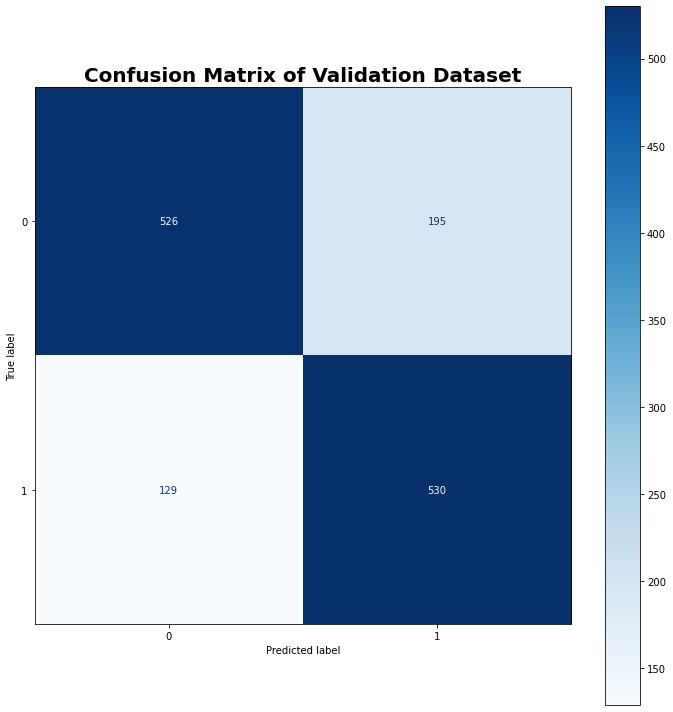

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(base_model, x_valid_sc, y_valid, ax=ax, cmap=plt.cm.Blues)

plt.title('Confusion Matrix of Validation Dataset', fontweight = 'bold', fontsize = 20)

In [35]:
# Analyze the prediction probability of developed model for validation set.
y_pred_proba = base_model.predict_proba(x_valid_sc) 
prob_analysis = pd.DataFrame(y_pred_proba,columns = ['prob_nchurn', 'prob_churn'])
prob_analysis['actual'] = y_valid
prob_analysis['prediction'] = base_model.predict(x_valid_sc)
prob_analysis

prob_nchurn  prob_churn  actual  prediction
0        0.526861    0.473139       0           0
1        0.499724    0.500276       0           1
2        0.500168    0.499832       0           0
3        0.490261    0.509739       1           1
4        0.494598    0.505402       1           1
...           ...         ...     ...         ...
1375     0.479936    0.520064       1           1
1376     0.501588    0.498412       1           0
1377     0.511280    0.488720       0           0
1378     0.495017    0.504983       0           1
1379     0.496867    0.503133       1           1

[1380 rows x 4 columns]

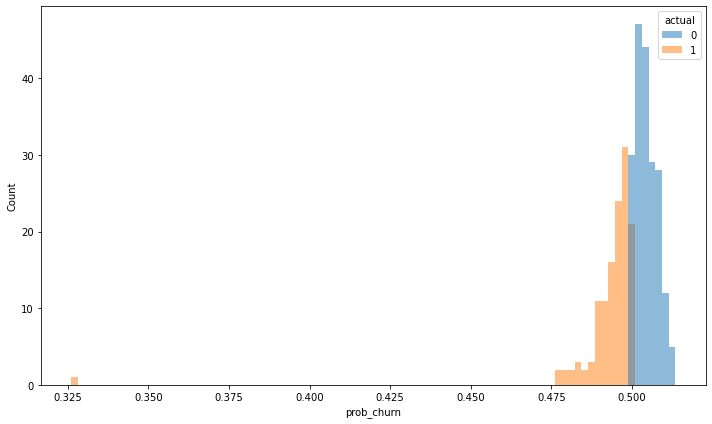

In [60]:
df_valid_prob = prob_analysis[prob_analysis.actual != prob_analysis.prediction ]
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
             data=df_valid_prob, x="prob_churn", hue="actual",
             fill=True, common_norm=False,
             alpha=.5, linewidth=0,
            )
plt.show()

# The developed model made incorrect predictions in areas where it was unable to 
# provide clear estimates for the validation data.

# Prediction probabilities between 0.45 and 0.55 can be considered a risky group and can be further analyzed.

In [56]:
def prob_hist(df,thres):
    '''
    prob : "ok_prob" or "nok_prob"
    '''
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(
                 data=df, x="prob_churn", hue="actual",
                 fill=True, common_norm=False,
                 alpha=.5, linewidth=0,
                )

    plt.axvline(x= thres, linestyle='dashed',
                    color='purple') 

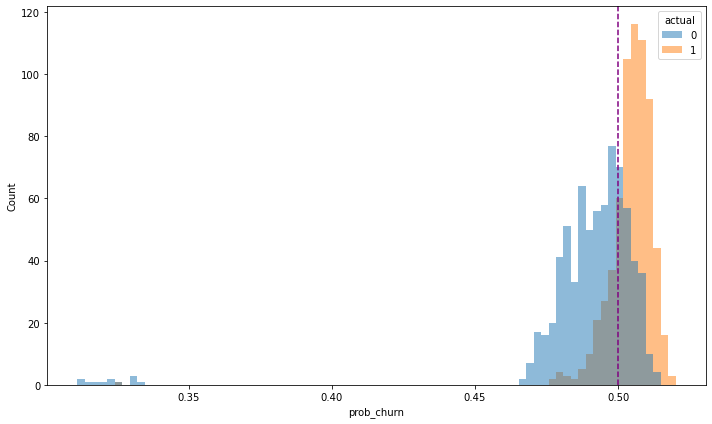

In [57]:
prob_hist(prob_analysis, 0.5)

In [37]:
# Analyze the prediction probability of developed model for test set.
x_test = df_test[df_train.drop('Churn_Yes',axis=1).columns].values
x_test_sc = sc.transform(x_test)
y_test = df_test['Churn_Yes'].values
y_pred_proba_test = base_model.predict_proba(x_test_sc) 
test_analysis = pd.DataFrame(y_pred_proba_test,columns = ['prob_nchurn', 'prob_churn'])
test_analysis['actual'] = y_test
test_analysis['prediction'] = base_model.predict(x_test_sc)
test_analysis

prob_nchurn  prob_churn  actual  prediction
0        0.513402    0.486598       0           0
1        0.515543    0.484457       0           0
2        0.499850    0.500150       0           1
3        0.493661    0.506339       0           1
4        0.504466    0.495534       0           0
...           ...         ...     ...         ...
2105     0.498753    0.501247       1           1
2106     0.488723    0.511277       1           1
2107     0.499761    0.500239       0           1
2108     0.504259    0.495741       1           0
2109     0.502541    0.497459       0           0

[2110 rows x 4 columns]

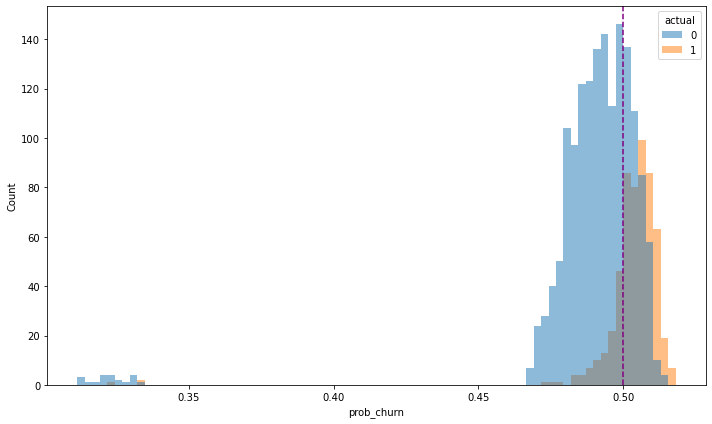

In [53]:
prob_hist(test_analysis, 0.5)

In [40]:
# Calculate model metrics
accuracy = accuracy_score(test_analysis['actual'], test_analysis['prediction'])
precision = precision_score(test_analysis['actual'], test_analysis['prediction']) 
recall = recall_score(test_analysis['actual'], test_analysis['prediction'])      
f1 = f1_score(test_analysis['actual'], test_analysis['prediction'])              

# Print the metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

Accuracy: 0.754
Precision: 0.519
Recall: 0.799
F1-Score: 0.629


Text(0.5, 1.0, 'Confusion Matrix of Test Dataset')

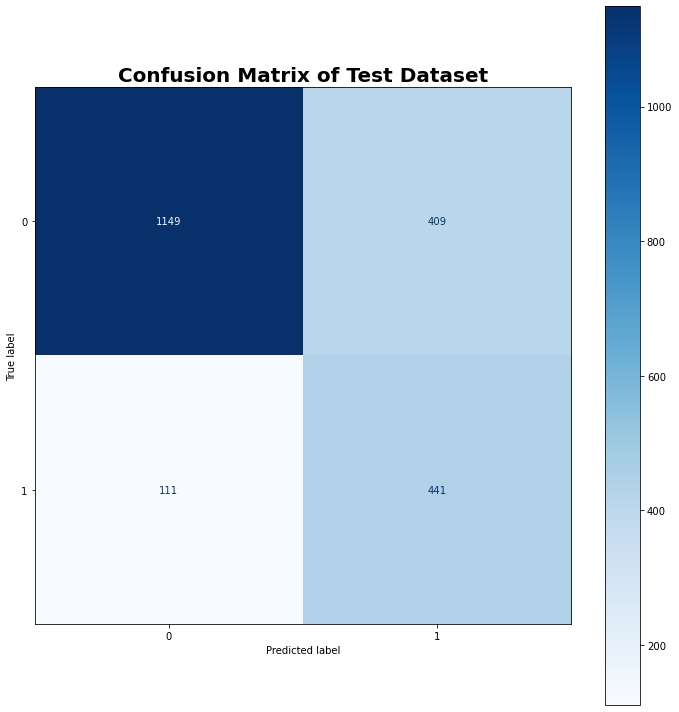

In [38]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(base_model, x_test_sc, y_test, ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix of Test Dataset', fontweight = 'bold', fontsize = 20)

<span style="font-size:1.2em;color:darkblue">**Conclusion**</span>

* <span style="font-size:1.02em;color:darkblue">**Although, the precision score is 0.51, it doesnot reflect that the weak model prediction ability. The test dataset is imbalance, so it is normal to calculate this precision score according to FP- TP ratio. The model has a good ability to cathc possible churn.**</span>

* <span style="font-size:1.02em;color:darkblue">**According to exploratory data analysis, it has been observed that churn is higher among customers using fiber infrastructure. In this regard, complaints related to fiber made by customers should be taken into consideration.**</span>

* <span style="font-size:1.02em;color:darkblue">**It has been observed that customers, particularly in their first years, tend to have a high inclination to switch telecom providers. Through various campaigns, these individuals could be offered long-term contracts instead of month-to-month agreement**</span>